In [1]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from massart import addNoise3, ground_truth_permutations
from LabelRankers import *


d = 15  # data dimension
k = 15  # labels

# Feature vectors distribution
D = multivariate_normal(mean=np.zeros(d), cov=np.identity(d))

# Linear Sorting Function
W_opt = np.random.rand(k, d)

# Train data
X_train = D.rvs(size=10000)

R_train = ground_truth_permutations(X_train, W_opt)
P_train = np.argsort(R_train, axis=1)

# Test data
X_test = D.rvs(size=10000)

R_test = ground_truth_permutations(X_test, W_opt)
P_test = np.argsort(R_test, axis=1)

In [2]:
labelwiseDecisionTreeLRScores = []
labelwiseRandomForestLRScores = []
pairwiseDecisionTreeLRScores = []
pairwiseRandomForestLRScores = []
pairwiseHalfspaceLRScores = []

def scores(eta_max):
  R_train_noisy = np.array([addNoise3(y, eta_max) for y in R_train])
  P_train_noisy = np.argsort(R_train_noisy, axis=1)
  labelwiseDecisionTreeLRScores.append(score(P_test, LabelwiseDecisionTreeLR().fit(X_train, P_train_noisy).predict(X_test)))
  labelwiseRandomForestLRScores.append(score(P_test, LabelwiseRandomForestLR().fit(X_train, P_train_noisy).predict(X_test)))
  pairwiseDecisionTreeLRScores.append(score(P_test, PairwiseDecisionTreeLR().fit(X_train, P_train_noisy).predict(X_test)))
  pairwiseRandomForestLRScores.append(score(P_test, PairwiseRandomForestLR().fit(X_train, P_train_noisy).predict(X_test)))
  pairwiseHalfspaceLRScores.append(score(P_test, PairwiseHalfspaceLR(0.005, 0.1, 0.8).fit(X_train, P_train_noisy).predict(X_test)))

In [3]:
etas = np.arange(.2, .5, .05)
for eta_max in etas: scores(eta_max)

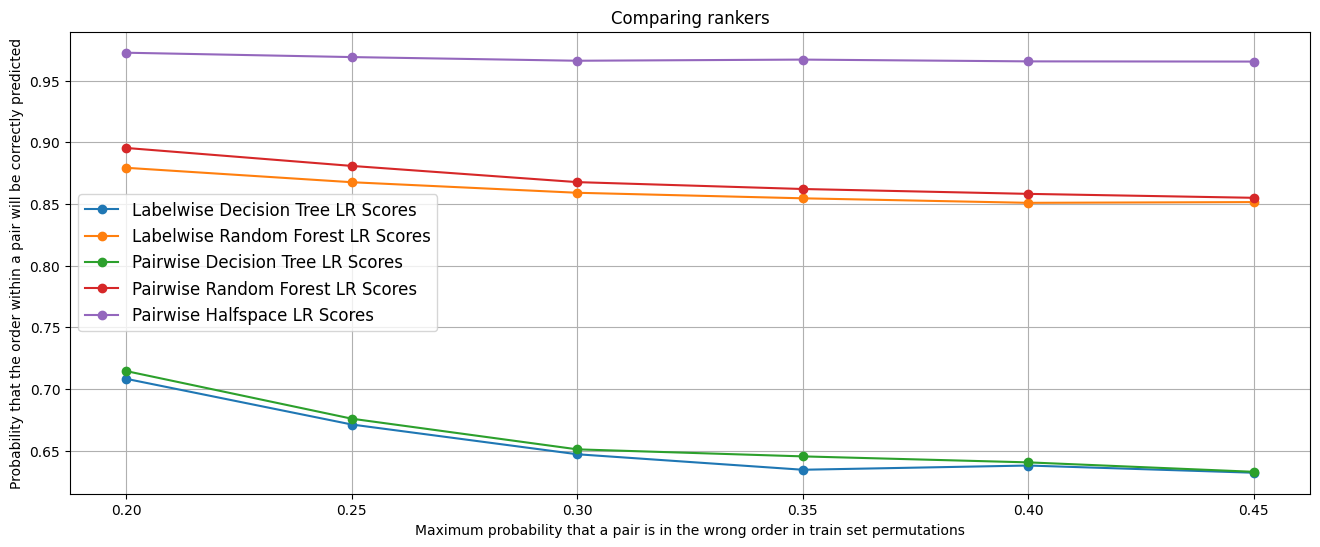

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.title('Comparing rankers')
plt.plot(etas, labelwiseDecisionTreeLRScores, '-o')
plt.plot(etas, labelwiseRandomForestLRScores, '-o')
plt.plot(etas, pairwiseDecisionTreeLRScores, '-o')
plt.plot(etas, pairwiseRandomForestLRScores, '-o')
plt.plot(etas, pairwiseHalfspaceLRScores, '-o')
plt.legend([
  'Labelwise Decision Tree LR Scores',
  'Labelwise Random Forest LR Scores',
  'Pairwise Decision Tree LR Scores',
  'Pairwise Random Forest LR Scores',
  'Pairwise Halfspace LR Scores'
  ], 
  fontsize=12
)
plt.xticks(etas)
plt.xlabel('Maximum probability that a pair is in the wrong order in train set permutations')
plt.ylabel('Probability that the order within a pair will be correctly predicted')
plt.grid()
plt.show()